In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

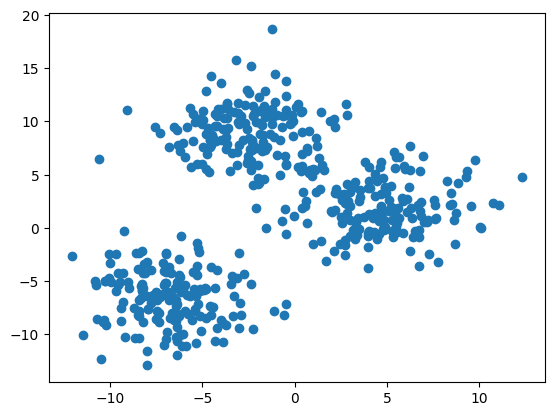

In [2]:
X, __ = make_blobs(n_samples=500, centers=3, cluster_std=2.5, random_state=42)

np.random.seed(1)
plt.scatter(X[::, 0], X[::, 1])
plt.show()

In [74]:
    def Kmeans_my(x, k, max_iter=100, tol=1e-4):
        
        centroids = x[random.sample(range(x.shape[0]), k)]
    
    
        def euclidean_distance(a, b):
            return np.sqrt(np.sum((a - b) ** 2))
    
        
        for i in range(max_iter):
            
            distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
            labels = np.argmin(distances, axis=1)
    
            
            clusters = [[] for _ in range(k)]
            
            for point in x:
                distance = [euclidean_distance(point, centroid) for centroid in centroids]
            
                closed_centroid_idx = np.argmin(distance)
                clusters[closed_centroid_idx].append(point)
            
            new_centroids = np.array([np.mean(cluster, axis=0) if len(cluster) > 0 else cetroids[idx] 
                                     for idx, cluster in enumerate(clusters)])
            
            if np.all(np.abs(new_centroids - centroids) <= tol):
                print(f'The algorithm converges in {i + 1} iterations.')
                break
            centroids = new_centroids
        
        return centroids, clusters, labels

In [75]:
centroids, clusters, labels = Kmeans_my(X, k=3) 

The algorithm converges in 4 iterations.


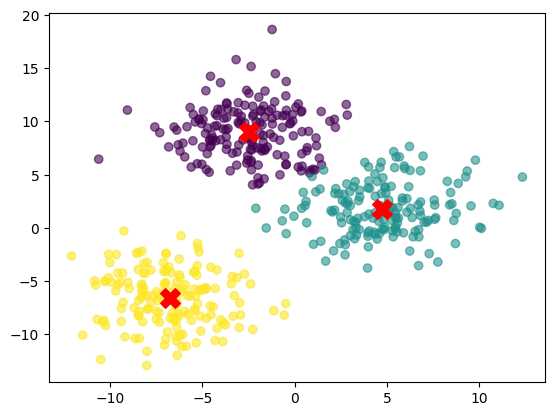

In [61]:
plt.scatter(X[::, 0], X[::, 1], c=labels, alpha=0.6)
plt.scatter(centroids[::, 0], centroids[::, 1], c='red', s=200, marker='X')
plt.show()

-----

In [53]:
from yellowbrick.cluster import KElbowVisualizer, kelbow_visualizer
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

model = KMeans(n_clusters=2)
model.fit(x)

KMeans(n_clusters=2)

In [38]:
labels = model.labels_
predict = model.predict(x)

In [37]:
predict

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [39]:
labels

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [42]:
cluster_0 = x[predict == 0]
cluster_1 = x[predict == 1]

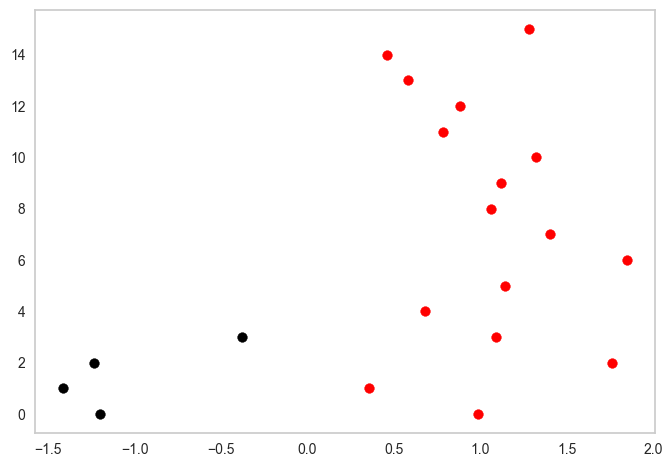

In [46]:
plt.scatter(cluster_0, range(len(cluster_0)) ,color = 'red')
plt.scatter(cluster_1, range(len(cluster_1)) ,color = 'black')
plt.grid(False)
plt.show()

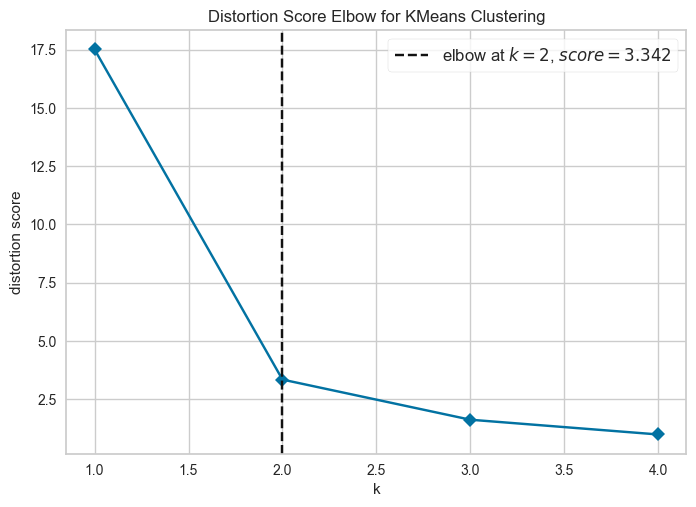

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
model_kmens = KMeans(random_state=0)
visualizer = KElbowVisualizer(model_kmens, k=(1, 5), timings=False)
visualizer.fit(x)
visualizer.show()

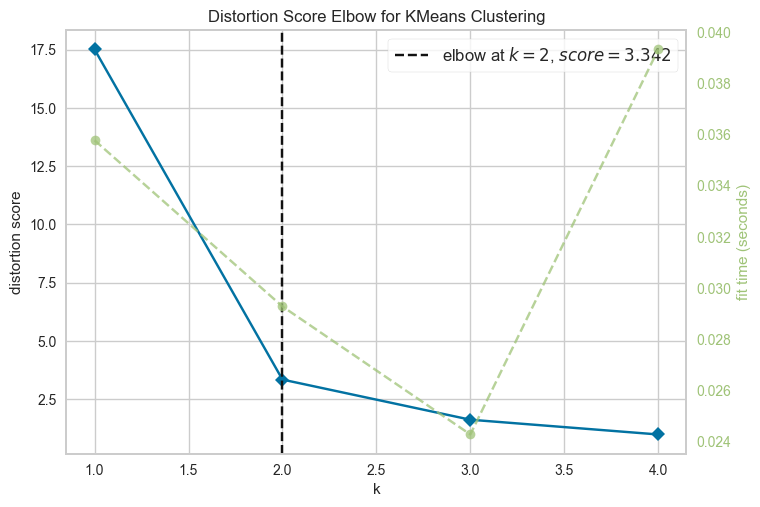

KElbowVisualizer(ax=<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=4, random_state=0), k=(1, 5))

In [54]:
kelbow_visualizer(KMeans(random_state=0), x, k=(1, 5), timing=False)

---------

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import KElbowVisualizer, kelbow_visualizer
import warnings
from sklearn import metrics
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

df = load_breast_cancer()

x = pd.DataFrame(df.data, columns=df.feature_names)
x['y'] = df.target

In [2]:
x_train, x_test, y_train, y_test = train_test_split(x.iloc[::, :-1], x.iloc[::, -1], test_size=0.3, random_state=1)

KElbowVisualizer(ax=<AxesSubplot: >,
                 estimator=KMeans(n_clusters=9, random_state=1), k=(1, 10),
                 timings=False)

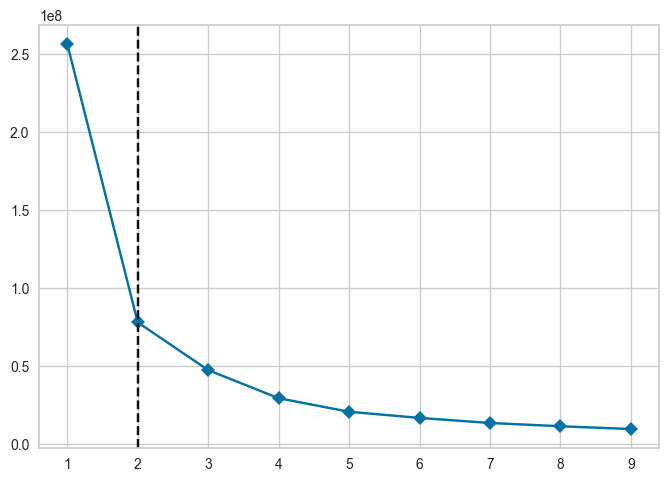

In [3]:
visual = KElbowVisualizer(KMeans(random_state=1), k=(1, 10), timings=False)
visual.fit(x.iloc[::, :-1])

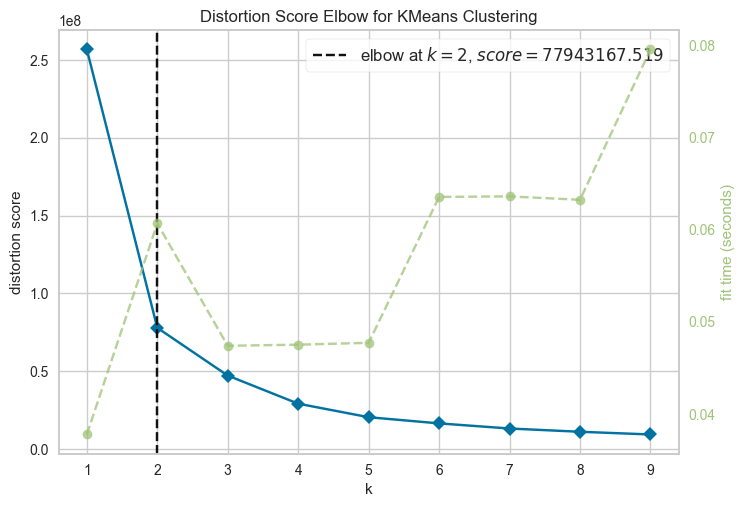

KElbowVisualizer(ax=<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, random_state=0), k=(1, 10))

In [45]:
kelbow_visualizer(KMeans(random_state=0), x, k=(1, 10), timing=False)

In [92]:
model = KMeans(n_clusters=2, init='k-means++')
model.fit(x_train)

KMeans(n_clusters=2)

In [93]:
predict = model.predict(x_test)
labels = model.labels_

In [94]:
print(predict)
print(labels)

[0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1
 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0

In [95]:
print(metrics.homogeneity_score(labels, y_train))

0.48785017799371155


In [96]:
print(metrics.silhouette_score(x_train, labels))

0.7111833912789096


In [99]:
print(f"Inertia: {model.inertia_:.2f}")

Inertia: 57330800.71


In [100]:
print(f'davies_bouldin_score: {metrics.davies_bouldin_score(x_train, labels)}')

davies_bouldin_score: 0.47663444426379975


In [101]:
print(f"Calinski-Harabasz Index: {metrics.calinski_harabasz_score(x_train, labels):.2f}")

Calinski-Harabasz Index: 997.20


-----

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

x, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)


k_means = KMeans(n_clusters=4, init='random', n_init=1, random_state=42)
k_means_plus = KMeans(n_clusters=4, init='k-means++', n_init=1, random_state=42)

In [14]:
k_means.fit(x)

KMeans(init='random', n_clusters=4, n_init=1, random_state=42)

In [15]:
k_means_plus.fit(x)

KMeans(n_clusters=4, n_init=1, random_state=42)

Text(0.5, 1.0, 'Kmens (++)')

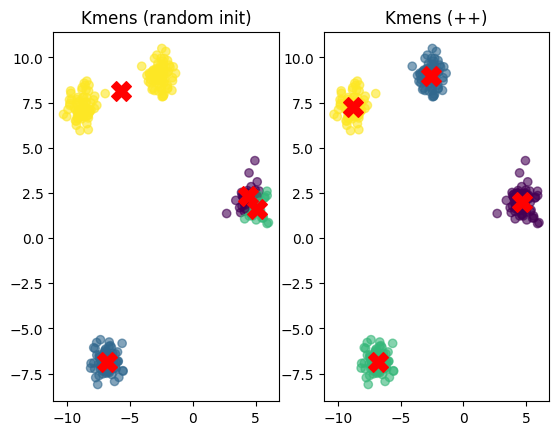

In [24]:
plt.subplot(1, 2, 1)
plt.scatter(x[::, 0], x[::, 1], c=k_means.labels_, cmap='viridis', alpha=0.6)
plt.scatter(k_means.cluster_centers_[::, 0], k_means.cluster_centers_[::, 1], s=200, c='r', marker='X')
plt.title('Kmens (random init)')

plt.subplot(1, 2, 2)
plt.scatter(x[::, 0], x[::, 1], c=k_means_plus.labels_, cmap='viridis', alpha=0.6)
plt.scatter(k_means_plus.cluster_centers_[::, 0], k_means_plus.cluster_centers_[::, 1], s=200, c='r', marker='X')
plt.title('Kmens (++)')